## Spam Classification


In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy

# Sklearn
from sklearn.model_selection import train_test_split


# Built-in library
import re
import warnings

warnings.filterwarnings("ignore")

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Black code formatter (Optional)
%load_ext lab_black
# auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
def load_data(
    *, filename: str, sep: str = ",", encoding: str = "utf-8"
) -> pd.DataFrame:
    """This is used to load the data.
    Params;
        filename (str): The filepath.
        sep (str, default=","): The separator. e.g ",", "\t", etc
        encoding (str, default="utf-8): The encoding type.

    Returns:
        data (pd.DataFrame): The loaded dataframe.
    """
    data = pd.read_csv(filename, sep=sep, encoding=encoding)
    return data

In [3]:
# Download the data
# !wget https://lazyprogrammer.me/course_files/spam.csv

In [4]:
# Load Data
fp = "spam.csv"
data = load_data(filename=fp, encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN


In [5]:
# Drop irrelevant columns
data = data.iloc[:, :2]

# Rename columns
data.columns = ["label", "text"]

data.head(3)

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


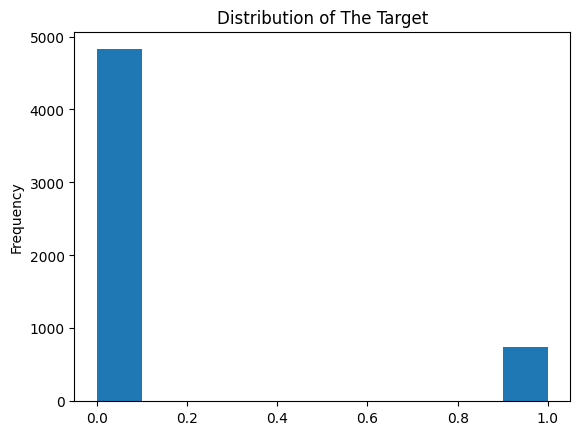

In [6]:
# Check the distrbution of the target
mapper = {"ham": 0, "spam": 1}
data["label"] = data["label"].map(mapper)
data["label"].plot(kind="hist", title="Distribution of The Target")
plt.show()

In [7]:
# Split the data into train and validation data
RANDOM_STATE = 123
TEST_SIZE = 0.2

X = data["text"]
y = data["label"]

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)
X_train.shape, X_validation.shape

((4457,), (1115,))

In [8]:
# Vectorize the data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Init
tfidf = TfidfVectorizer(encoding="ISO-8859-1")
# tfidf = TfidfVectorizer(decode_error="ignore")

# Fit
X_train_vec = tfidf.fit_transform(X_train)
X_validation_vec = tfidf.transform(X_validation)

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Init
mnb = MultinomialNB()

# Fit
mnb.fit(X_train_vec, y_train)

# Make predictions
y_pred_train = mnb.predict(X_train_vec)
y_proba_train = mnb.predict_proba(X_train_vec)[:, 1]

y_pred_validation = mnb.predict(X_validation_vec)
y_proba_validation = mnb.predict_proba(X_validation_vec)[:, 1]

#### Evaluation Metrics

In [10]:
# Classification report
clf_report_train = metrics.classification_report(y_true=y_train, y_pred=y_pred_train)
print(clf_report_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3843
           1       1.00      0.81      0.90       614

    accuracy                           0.97      4457
   macro avg       0.99      0.91      0.94      4457
weighted avg       0.97      0.97      0.97      4457



In [11]:
# Classification report
clf_report_validation = metrics.classification_report(
    y_true=y_validation, y_pred=y_pred_validation
)
print(clf_report_validation)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       1.00      0.70      0.82       133

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.97      0.96      0.96      1115



In [12]:
# AUC Score
auc_score_train = metrics.roc_auc_score(y_true=y_train, y_score=y_proba_train)
auc_score_validation = metrics.roc_auc_score(
    y_true=y_validation, y_score=y_proba_validation
)

auc_score_train, auc_score_validation

(0.9932547946645239, 0.9883006906267705)

In [13]:
# Confusion Matrix
conf_mat_train = metrics.confusion_matrix(y_true=y_train, y_pred=y_pred_train)
conf_mat_train

array([[3843,    0],
       [ 116,  498]])

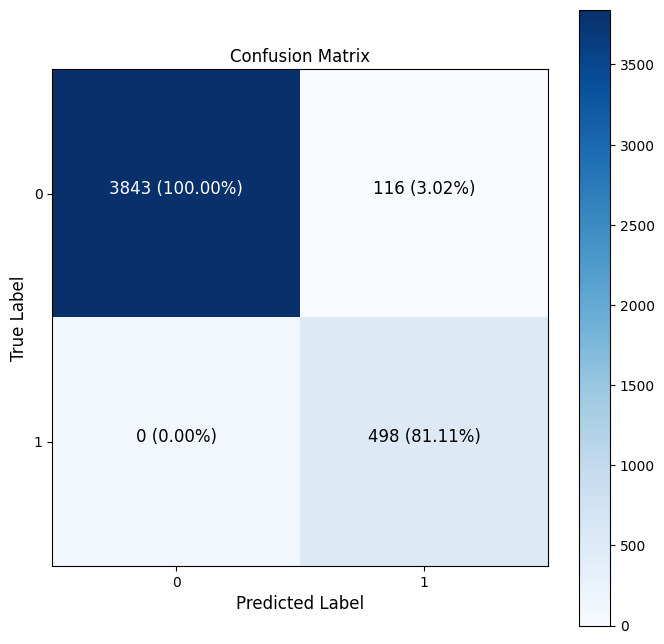

In [14]:
from src.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train, figsize=(8, 8))

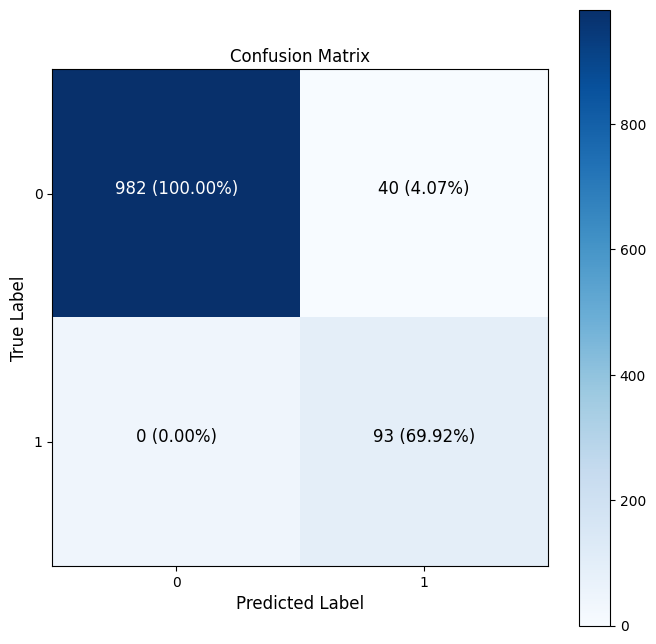

In [15]:
plot_confusion_matrix(y_true=y_validation, y_pred=y_pred_validation, figsize=(8, 8))

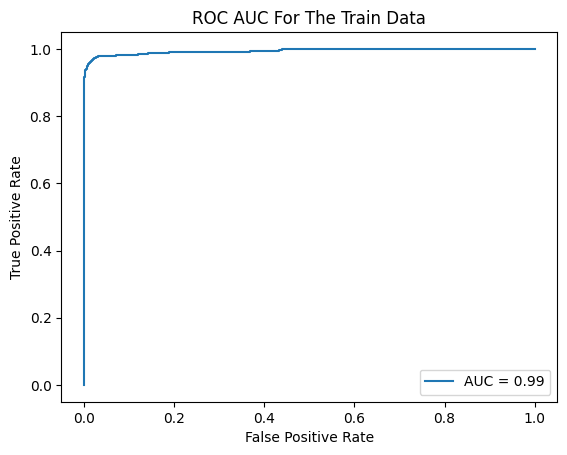

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_true=y_train, y_score=y_proba_train)

auc_score_1 = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_1, estimator_name=None
)
display.plot()
plt.title("ROC AUC For The Train Data")

plt.show()

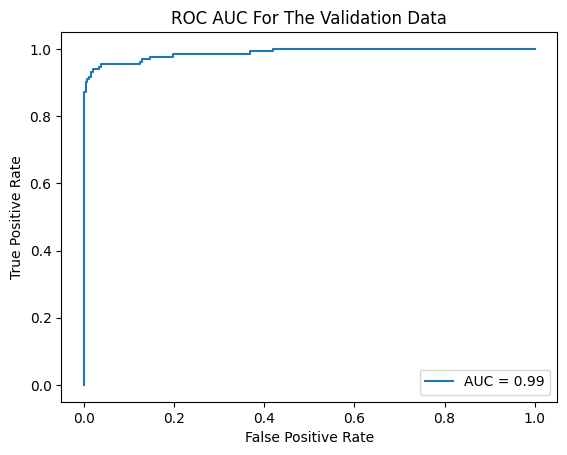

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_validation, y_score=y_proba_validation
)

auc_score_2 = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_2, estimator_name=None
)
display.plot()
plt.title("ROC AUC For The Validation Data")

plt.show()

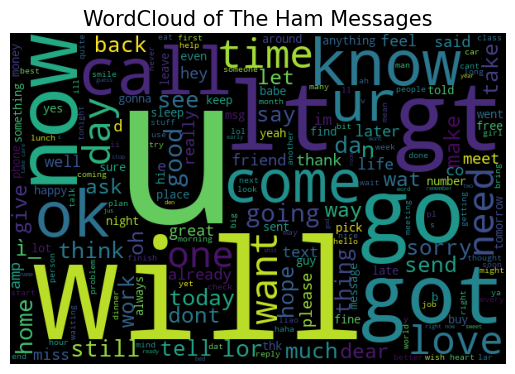

In [18]:
from wordcloud import WordCloud

WIDTH, HEIGHT = 600, 400

text = "".join(list(data.loc[data["label"] == 0, "text"].str.lower()))
wordcloud = WordCloud(width=WIDTH, height=HEIGHT).generate(text)

plt.imshow(wordcloud)
plt.title("WordCloud of The Ham Messages", size=15)
plt.axis("off")
plt.show()

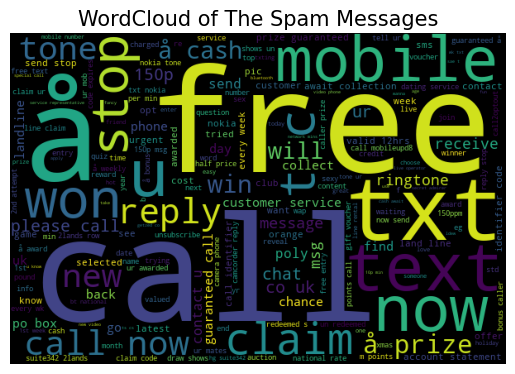

In [19]:
text = "".join(list(data.loc[data["label"] == 1, "text"].str.lower()))
wordcloud = WordCloud(width=WIDTH, height=HEIGHT).generate(text)

plt.imshow(wordcloud)
plt.title("WordCloud of The Spam Messages", size=15)
plt.axis("off")
plt.show()

In [20]:
# Check the wrongly classified messages
temp = pd.concat([X_train, y_train], axis=1).copy()
temp["pred"] = y_pred_train
wrong_ham = temp.loc[((temp["label"] == 1) & (temp["pred"] == 0))]
wrong_ham.head()

,text,label,pred
3062,"Hi babe its Jordan, how r u? Im home from abroad and lonely, text me back if u wanna chat xxSP visionsms.com Text stop to stopCost 150p 08712400603",1,0
3332,"You are being contacted by our dating service by someone you know! To find out who it is, call from a land line 09050000928. PoBox45W2TG150P",1,0
4296,thesmszone.com lets you send free anonymous and masked messages..im sending this message from there..do you see the potential for abuse???,1,0
689,<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.,1,0
138,You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again,1,0


In [21]:
# Check the wrongly classified messages
temp = pd.concat([X_validation, y_validation], axis=1).copy()
temp["pred"] = y_pred_validation
wrong_ham = temp.loc[((temp["label"] == 1) & (temp["pred"] == 0))]
wrong_ham.head()

,text,label,pred
4796,Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com,1,0
671,SMS. ac sun0819 posts HELLO:\You seem cool,1,0
2353,Please CALL 08712402902 immediately as there is an urgent message waiting for you.,1,0
95,"Your free ringtone is waiting to be collected. Simply text the password \MIX\"" to 85069 to verify. Get Usher and Britney. FML",1,0
4132,FreeMsg Today's the day if you are ready! I'm horny & live in your town. I love sex fun & games! Netcollex Ltd 08700621170150p per msg reply Stop to end,1,0
